<a href="https://colab.research.google.com/github/Bhupesh1111/Unsupervised_ML_project_on_Netflix/blob/main/My_personal_colab_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** -NETFLIX MOVIES AND TV SHOWS CLUSTERING



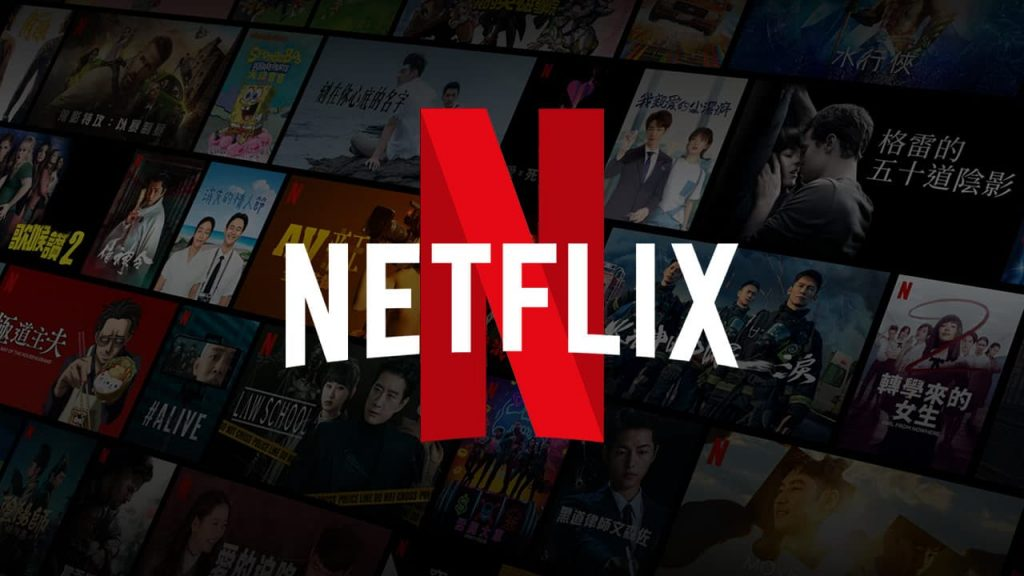

##### **Project Type**    - Unsupervised
##### **Contribution**    - Team

##### **Team Members**        

#### **1.**Sharik Nawaz
#### **2.**Bhupesh Rajput

# **Project Summary -**

The entertainment industry is highly competitive, and success is dependent on various factors, including genre, rating, production budget, cast, and more. In this context, a study was conducted to understand the factors influencing the popularity of movies and TV shows on Netflix. The study used a dataset containing around 12 variables to cluster the movies and TV shows based on their popularity and audience preferences. The first step in the analysis involved data wrangling, where missing values were handled, and unique values were checked. The study identified that there were 2389 missing values for the 'director' column, 718 for the 'cast' column, 507 for the 'country' column, and 10 for the 'date_added' column. These missing values were removed by dropping the corresponding rows.

After understanding the data and getting variables, we first gathered and **cleaned the data, handled the null values** by checking the distribution and outliers in the data after that we have also typecasted the needed features into required format by **type casting** in order to visualize them properly. We performed indepth **EDA** and plotted different types of graphs by separating them into univariate, bivariate and multivariate categories as a result, We came accross some meaningful insights that helped us to make future decisions of ML model pipeline. Then further on, using **feature engineering** and data preprocessing  we have extracted new features like pulse_pressure and glucose_diabetes with the help of some features which are not directly impacting to tenYearCHD. We also tried to get some impacting features by removing **multicollinearity** within the independent variables with the help of **various inflation factor(VIF)**. In this dataset we have not **handled outliers** as removing them could potentially lead to a loss of important information and biased results.

According to the countplot, it appears that Netflix adds the highest number of movies and TV shows during the period between October and January. This period seems to be the busiest time of year for Netflix in terms of adding new content to its platform. Netflix has the highest number of content in the United States, followed by India. India has the highest number of movies on Netflix.

To cluster the shows, the study focused on six key attributes: director, cast, country, genre, rating, and description. These attributes were transformed into a 10,000-feature TFIDF vectorization, and **Principal Component Analysis (PCA)** was used to reduce the components to 3000, capturing more than 80% of the variance. Next, two clustering algorithms, **K-Means and Agglomerative clustering**, were used to group the shows. **K-Means** determined that the optimal number of clusters was 5, while **Agglomerative clustering suggested 7 clusters, which were visualized using a dendrogram**.

Finally, a content-based recommender system was created using the similarity matrix obtained through cosine similarity. This system provides personalized recommendations based on the type of show the user has watched, giving them 10 top-notch suggestions to explore. In summary, the study identified key trends in the Netflix dataset, including the growth rate of movies versus TV shows, the busiest period for adding new content, and the content demographics. Through clustering and a content-based recommender system, the study was able to provide personalized recommendations based on the user's viewing history. This study provides valuable insights into the factors influencing the popularity of movies and TV shows on Netflix, offering a foundation for further research and analysis.

# **Problem Statement**


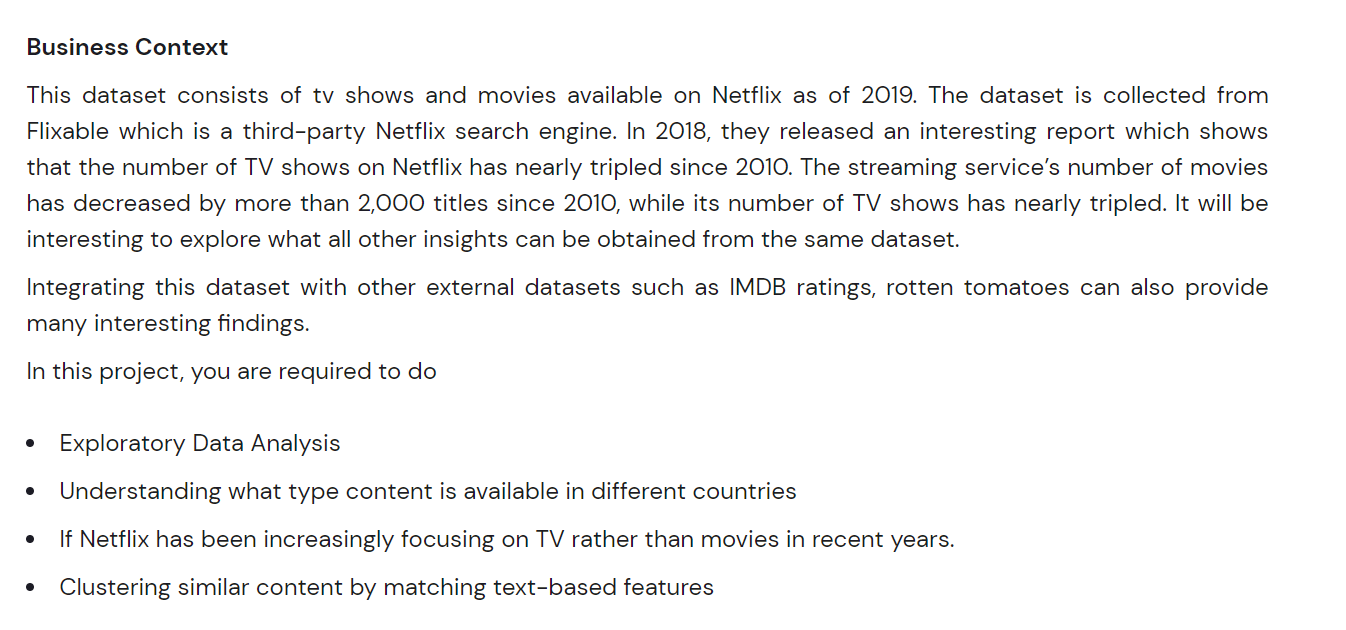

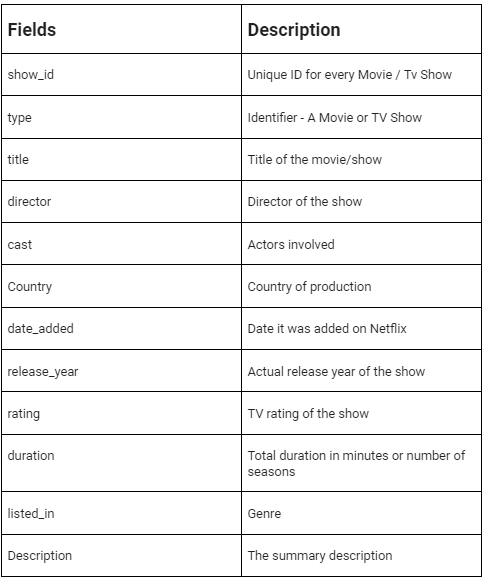

# **GitHub Link -**

Bhupesh Rajput -
https://github.com/Bhupesh1111/Unsupervised_ML_project_on_Netflix


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd


import warnings    # do not disturb mode
warnings.filterwarnings('ignore')

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
import scipy.stats as stats

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from scipy.stats import ttest_ind
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# library used for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive',force_remount= True)

Mounted at /content/drive


In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head(20)

show_id     type   title              director  \
0       s1  TV Show      3%                   NaN   
1       s2    Movie    7:19     Jorge Michel Grau   
2       s3    Movie   23:59          Gilbert Chan   
3       s4    Movie       9           Shane Acker   
4       s5    Movie      21        Robert Luketic   
5       s6  TV Show      46           Serdar Akar   
6       s7    Movie     122       Yasir Al Yasiri   
7       s8    Movie     187        Kevin Reynolds   
8       s9    Movie     706         Shravan Kumar   
9      s10    Movie    1920          Vikram Bhatt   
10     s11    Movie    1922          Zak Hilditch   
11     s12  TV Show    1983                   NaN   
12     s13  TV Show    1994  Diego Enrique Osorno   
13     s14    Movie   2,215   Nottapon Boonprakob   
14     s15    Movie    3022            John Suits   
15     s16    Movie  Oct-01        Kunle Afolayan   
16     s17  TV Show  Feb-09                   NaN   
17     s18    Movie  22-Jul       Paul Greengrass   
18     s19    Movie  15-Aug    Swapnaneel Jayakar   
19     s20    Movie     '89                   NaN   

                                                 cast  \
0   João Miguel, Bianca Comparato, Michel Gomes, R...   
1   Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2   Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3   Elijah Wood, John C. Reilly, Jennifer Connelly...   
4   Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
5   Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...   
6   Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...   
7   Samuel L. Jackson, John Heard, Kelly Rowan, Cl...   
8   Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...   
9   Rajneesh Duggal, Adah Sharma, Indraneil Sengup...   
10  Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...   
11  Robert Więckiewicz, Maciej Musiał, Michalina O...   
12                                                NaN   
13                                 Artiwara Kongmalai   
14  Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...   
15  Sadiq Daba, David Bailie, Kayode Olaiya, Kehin...   
16  Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...   
17  Anders Danielsen Lie, Jon Øigarden, Jonas Stra...   
18  Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...   
19                 Lee Dixon, Ian Wright, Paul Merson   

                           country         date_added  release_year rating  \
0                           Brazil    August 14, 2020          2020  TV-MA   
1                           Mexico  December 23, 2016          2016  TV-MA   
2                        Singapore  December 20, 2018          2011      R   
3                    United States  November 16, 2017          2009  PG-13   
4                    United States    January 1, 2020          2008  PG-13   
5                           Turkey       July 1, 2017          2016  TV-MA   
6                            Egypt       June 1, 2020          2019  TV-MA   
7                    United States   November 1, 2019          1997      R   
8                            India      April 1, 2019          2019  TV-14   
9                            India  December 15, 2017          2008  TV-MA   
10                   United States   October 20, 2017          2017  TV-MA   
11           Poland, United States  November 30, 2018          2018  TV-MA   
12                          Mexico       May 17, 2019          2019  TV-MA   
13                        Thailand      March 1, 2019          2018  TV-MA   
14                   United States     March 19, 2020          2019      R   
15                         Nigeria  September 1, 2019          2014  TV-14   
16                             NaN     March 20, 2019          2018  TV-14   
17  Norway, Iceland, United States   October 10, 2018          2018      R   
18                           India     March 29, 2019          2019  TV-14   
19                  United Kingdom       May 16, 2018          2017  TV-PG   

     duration                                       

In [ ]:
# It's give total no of rows and column of our data set
print(f'we have total {df.shape[0]} rows and{df.shape[1]} columns.')

we have total 7787 rows and12 columns.


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
No_of_duplicate_rows=df[df.duplicated()].shape[0]
print(f'we hve total no {No_of_duplicate_rows} duplicate rows.')

we hve total no 0 duplicate rows.


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Checking the sum of null values for each column

df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

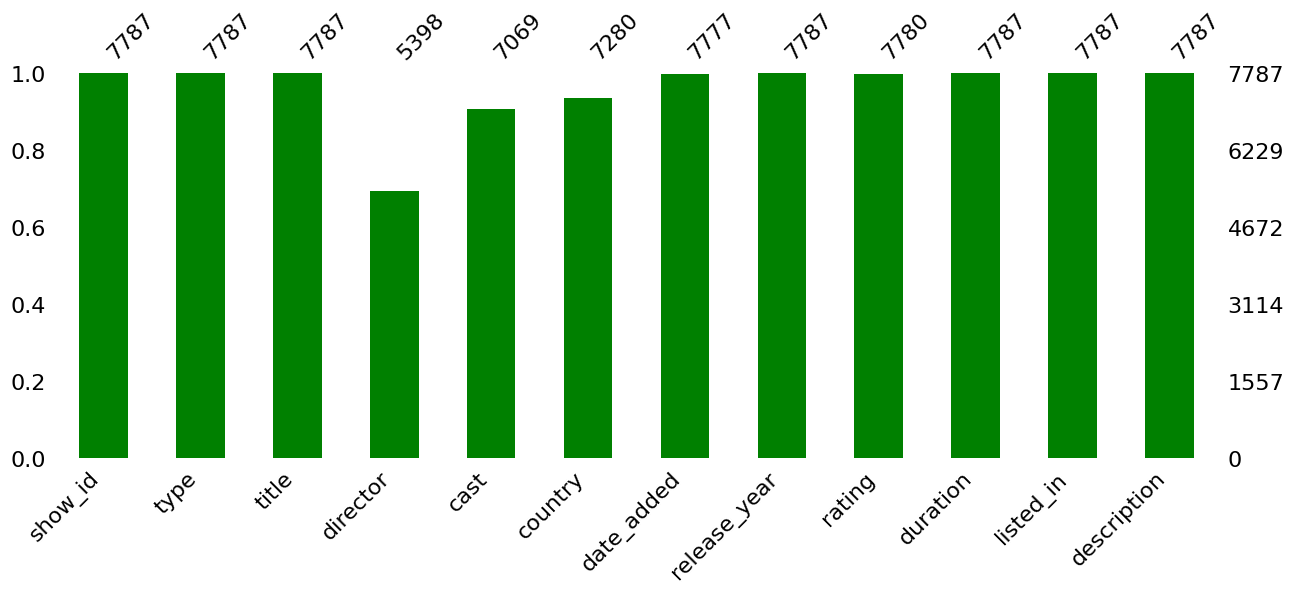

In [ ]:
# Visualizing the missing values
msno.bar(df,figsize=(15,5), color="green")

### What did you know about your dataset?


* We have a dataset that contains Movies/TV shows in Netflix until 2019.
* The dataset has 7787 entries and 12 columns. Out of the 12 columns, 11 are of 'object' datatype and 1 is of 'numeric' datatype.
* There are no duplicate values in the dataset.
* There are five columns containing missing values. There are total 3631 missing values present in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

release_year   count  kmeans_cluster
count   7770.000000  7770.0     7770.000000
mean    2013.935393     1.0        2.179151
std        8.764357     0.0        1.285514
min     1925.000000     1.0        0.000000
25%     2013.000000     1.0        1.000000
50%     2017.000000     1.0        3.000000
75%     2018.000000     1.0        3.000000
max     2021.000000     1.0        4.000000

### Variables Description



1. *show_id*: Unique ID for every Movie/TV show
2. *type*: A movie or a TV show
3. *title*: Title of the Movie/TV show
4. *director*: Director of the Movie/TV show
5. *cast*: Actors in the movie
6. *country*: Country of produciton
7. *date_added*: Date it was added on Netflix
8. *release_year*: Actual release year of the Movie/TV show
9. *rating*: Movie/TV show rating
10. *duration*: duration in minutes/number of seasons
11. *listed_in*: Genre
12. *Description*: The description summary


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

In [ ]:
# imputing with unknown in null values of director and cast feature
df[['director','cast']]=df[['director','cast']].fillna("Unknown")

# Imputing null values of country with Mode
df['country']=df['country'].fillna(df['country'].mode()[0])

# Dropping remaining null values of date_added and rating
df.dropna(axis=0, inplace=True)

In [ ]:
# Rechecking the Missing Values/Null Values Count
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

####2.  Handling nested columns i.e 'director', 'cast', 'listed_in' and 'country'

In [ ]:
# Let's create a copy of dataframe and unnest the original one
df_new= df.copy()

In [ ]:
# Unnesting 'director' column
dir_df=df_new['director'].apply(lambda x: str(x).split(', ')).tolist()
df1=pd.DataFrame(dir_df,index=df_new['title'])
df1= df1.stack()
df1=pd.DataFrame(df1.reset_index())
df1=df1.drop(['level_1'],axis=1)
df1.rename(columns={0:"Director"},inplace=True)
df1


title           Director
0                                          3%            Unknown
1                                        7:19  Jorge Michel Grau
2                                       23:59       Gilbert Chan
3                                           9        Shane Acker
4                                          21     Robert Luketic
...                                       ...                ...
8482                                     Zozo        Josef Fares
8483                                   Zubaan        Mozez Singh
8484                        Zulu Man in Japan            Unknown
8485                    Zumbo's Just Desserts            Unknown
8486  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS           Sam Dunn

[8487 rows x 2 columns]

In [ ]:
# Unnesting 'cast' column
cast_constraint=df_new['cast'].apply(lambda x: str(x).split(', ')).tolist()
df2 = pd.DataFrame(cast_constraint, index = df_new['title'])
df2=df2.stack()
df2 = pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'Actors'},inplace=True)
df2 = df2.drop(['level_1'],axis=1)
df2


title                 Actors
0                                           3%            João Miguel
1                                           3%       Bianca Comparato
2                                           3%           Michel Gomes
3                                           3%        Rodolfo Valente
4                                           3%        Vaneza Oliveira
...                                        ...                    ...
56558                                   Zubaan  Chittaranjan Tripathy
56559                        Zulu Man in Japan                Nasty C
56560                    Zumbo's Just Desserts          Adriano Zumbo
56561                    Zumbo's Just Desserts            Rachel Khoo
56562  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS                Unknown

[56563 rows x 2 columns]

In [ ]:
# Unnesting 'listed_in' column
listed_constraint=df_new['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(listed_constraint, index = df_new['title'])
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'Genre'},inplace=True)
df3 = df3.drop(['level_1'],axis=1)
df3.head(10)

title                   Genre
0     3%  International TV Shows
1     3%               TV Dramas
2     3%     TV Sci-Fi & Fantasy
3   7:19                  Dramas
4   7:19    International Movies
5  23:59           Horror Movies
6  23:59    International Movies
7      9      Action & Adventure
8      9      Independent Movies
9      9        Sci-Fi & Fantasy

In [ ]:
# Unnesting 'country' column
country_df=df_new['country'].apply(lambda x: str(x).split(', ')).tolist()
df4=pd.DataFrame(country_df,index=df_new['title'])
df4=df4.stack()
df4=pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'country'},inplace=True)
df4= df4.drop(['level_1'],axis=1)
df4.head(10)

title        country
0     3%         Brazil
1   7:19         Mexico
2  23:59      Singapore
3      9  United States
4     21  United States
5     46         Turkey
6    122          Egypt
7    187  United States
8    706          India
9   1920          India

sucessfully separated the nested columns. Now let's just merge all the created dataframe into the single merged dataframe.

In [ ]:
# Merging director and cast
df5 = df2.merge(df1,on=['title'],how='inner')

# Merging listed_in with merged of (director and cast)
df6 = df5.merge(df3,on=['title'],how='inner')

# Merging country with merged of [listed_in with merged of (director and cast)]
merged_df = df6.merge(df4,on=['title'],how='inner')

# Head of final merged dataframe
merged_df.head()

title            Actors Director                   Genre country
0    3%       João Miguel  Unknown  International TV Shows  Brazil
1    3%       João Miguel  Unknown               TV Dramas  Brazil
2    3%       João Miguel  Unknown     TV Sci-Fi & Fantasy  Brazil
3    3%  Bianca Comparato  Unknown  International TV Shows  Brazil
4    3%  Bianca Comparato  Unknown               TV Dramas  Brazil

In [ ]:
# Merging unnested data with the created dataframe in order to make the final dataframe
final_df = merged_df.merge(df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration','description']],on=['title'],how='left')
final_df.head()

title            Actors Director                   Genre country     type  \
0    3%       João Miguel  Unknown  International TV Shows  Brazil  TV Show   
1    3%       João Miguel  Unknown               TV Dramas  Brazil  TV Show   
2    3%       João Miguel  Unknown     TV Sci-Fi & Fantasy  Brazil  TV Show   
3    3%  Bianca Comparato  Unknown  International TV Shows  Brazil  TV Show   
4    3%  Bianca Comparato  Unknown               TV Dramas  Brazil  TV Show   

        date_added  release_year rating   duration  \
0  August 14, 2020          2020  TV-MA  4 Seasons   
1  August 14, 2020          2020  TV-MA  4 Seasons   
2  August 14, 2020          2020  TV-MA  4 Seasons   
3  August 14, 2020          2020  TV-MA  4 Seasons   
4  August 14, 2020          2020  TV-MA  4 Seasons   

                                         description  
0  In a future where the elite inhabit an island ...  
1  In a future where the elite inhabit an island ...  
2  In a future where the elite inhabit an island ...  
3  In a future where the elite inhabit an island ...  
4  In a future where the elite inhabit an island ...

#### Binning of Rating attribute

In [ ]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

In [ ]:
# Checking head after binning
final_df.shape

(175807, 11)

####Type casting Attribute

In [ ]:
# Typecasting duration into integer by removing 'min' and 'season' from the end
final_df['duration']= final_df['duration'].apply(lambda x: int(x.split()[0]))

# Typecasting string object to datetime object of date_added column
final_df['date_added']= pd.to_datetime(final_df['date_added'])

# Extracting date, day, month and year from date_added column
final_df["day_added"]= final_df["date_added"].dt.day
final_df["month_added"]=final_df["date_added"].dt.month
final_df["year_added"]=final_df["date_added"].dt.year

# Dropping date_added
final_df.drop('date_added', axis=1, inplace=True)

In [ ]:
# Spearating the dataframes for further analysis
df_movies= final_df[final_df['type']== 'Movie']
df_tvshows= final_df[final_df['type']== 'TV Show']

# Printing the shape
print(df_movies.shape, df_tvshows.shape)

(126079, 13) (49728, 13)


In [ ]:
final_df

title            Actors  Director  \
0                                            3%       João Miguel   Unknown   
1                                            3%       João Miguel   Unknown   
2                                            3%       João Miguel   Unknown   
3                                            3%  Bianca Comparato   Unknown   
4                                            3%  Bianca Comparato   Unknown   
...                                         ...               ...       ...   
175802  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS           Unknown  Sam Dunn   
175803  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS           Unknown  Sam Dunn   
175804  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS           Unknown  Sam Dunn   
175805  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS           Unknown  Sam Dunn   
175806  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS           Unknown  Sam Dunn   

                         Genre         country     type  release_year rating  \
0       International TV Shows          Brazil  TV Show          2020  TV-MA   
1                    TV Dramas          Brazil  TV Show          2020  TV-MA   
2          TV Sci-Fi & Fantasy          Brazil  TV Show          2020  TV-MA   
3       International TV Shows          Brazil  TV Show          2020  TV-MA   
4                    TV Dramas          Brazil  TV Show          2020  TV-MA   
...                        ...             ...      ...           ...    ...   
175802           Documentaries          Canada    Movie          2019  TV-MA   
175803           Documentaries   United States    Movie          2019  TV-MA   
175804        Music & Musicals  United Kingdom    Movie          2019  TV-MA   
175805        Music & Musicals          Canada    Movie          2019  TV-MA   
175806        Music & Musicals   United States    Movie          2019  TV-MA   

        duration                                        description  \
0              4  In a future where the elite inhabit an island ...   
1              4  In a future where the elite inhabit an island ...   
2              4  In a future where the elite inhabit an island ...   
3              4  In a future where the elite inhabit an island ...   
4              4  In a future where the elite inhabit an island ...   
...          ...                                                ...   
175802        90  This documentary delves into the mystique behi...   
175803        90  This documentary delves into the mystique behi...   
175804        90  This documentary delves into the mystique behi...   
175805        90  This documentary delves into the mystique behi...   
175806        90  This documentary delves into the mystique behi...   

        day_added  month_added  year_added  
0              14            8        2020  
1              14            8        2020  
2              14            8        2020  
3              14            8        2020  
4              14            8        2020  
...           ...          ...         ...  
175802          1            3        2020  
175803          1            3        2020  
175804          1            3        2020  
175805          1            3        2020  
175806          1            3        2020  

[175807 rows x 13 columns]

### What all manipulations have you done and insights you found?


###In this section, we addressed missing values by either imputing them or dropping them for specific features:

###**Imputation:**

###Imputed 'director' and 'cast' with the  value 'Unknown'.
###Imputed 'country' with the mode of the respective column.

###**Unnesting:**

###Extracted individual values from the following features: 'director', 'cast', 'listed_in', and 'country'.
###Created separate DataFrames to store the unnested values for each feature.

###**Merging:**

###Performed a left join to combine the original DataFrame with the unnested DataFrames. This facilitated the isolation of individual values for each feature.
###**Rating Categorization:**

###Observed that the 'rating' column contained various coded categories.
###Created five bins to categorize the ratings:
###Adult: TV-MA, NC-17
###Restricted: R, UR
###Teen: PG-13, TV-14
###All Ages: TV-G, TV-Y, TV-Y7, TV-Y7-FV, PG, G, TV-PG
###Not Rated: NR
###**Data Splitting:**

###Split the DataFrame into two subsets:
###'df_movies' containing only movie records.
###'df_tvshows' containing only TV show records.
###These preprocessing steps provide a structured and cleaned dataset, enabling more focused and meaningful analysis for both movies and TV shows.    

##  **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### Univariate Analysis

##  What proportion of the overall content on Netflix consists of movies and TV shows?

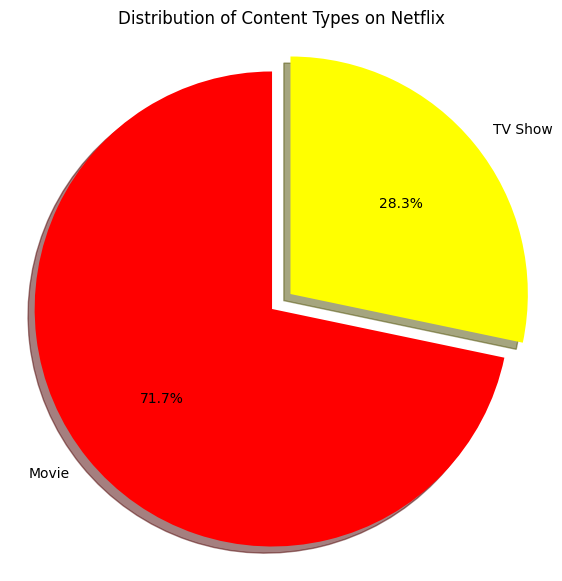

In [ ]:
# Create a DataFrame of the count of each unique value in the 'type' column
type_counts = final_df['type'].value_counts()
plt.figure(figsize=(7,7))
# Create a pie chart of the 'type' column
plt.pie(type_counts, labels=type_counts.index,colors=['#FF0000','#FFFF00'],explode=(0, 0.1),shadow=True, autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Content Types on Netflix')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are one of the best ways for univariate analysis of categorical data.

##### 2. What is/are the insight(s) found from the chart?

Out of 7787 rows in our dataset, we have 69% of them as movies, the rest 31% is TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that there are more movies on Netflix than TV shows is unlikely to have a significant positive or negative business impact on its own. However, this information could be used in conjunction with other insights and data to inform business decisions.

For example, if Netflix notices that TV shows are more popular with its subscribers than movies, it may decide to focus more on acquiring TV show content. Alternatively, if it sees that its original movie productions are gaining popularity, it may decide to invest more in that area.

##Total Number of Movies/TV Shows added per month on Netflix.

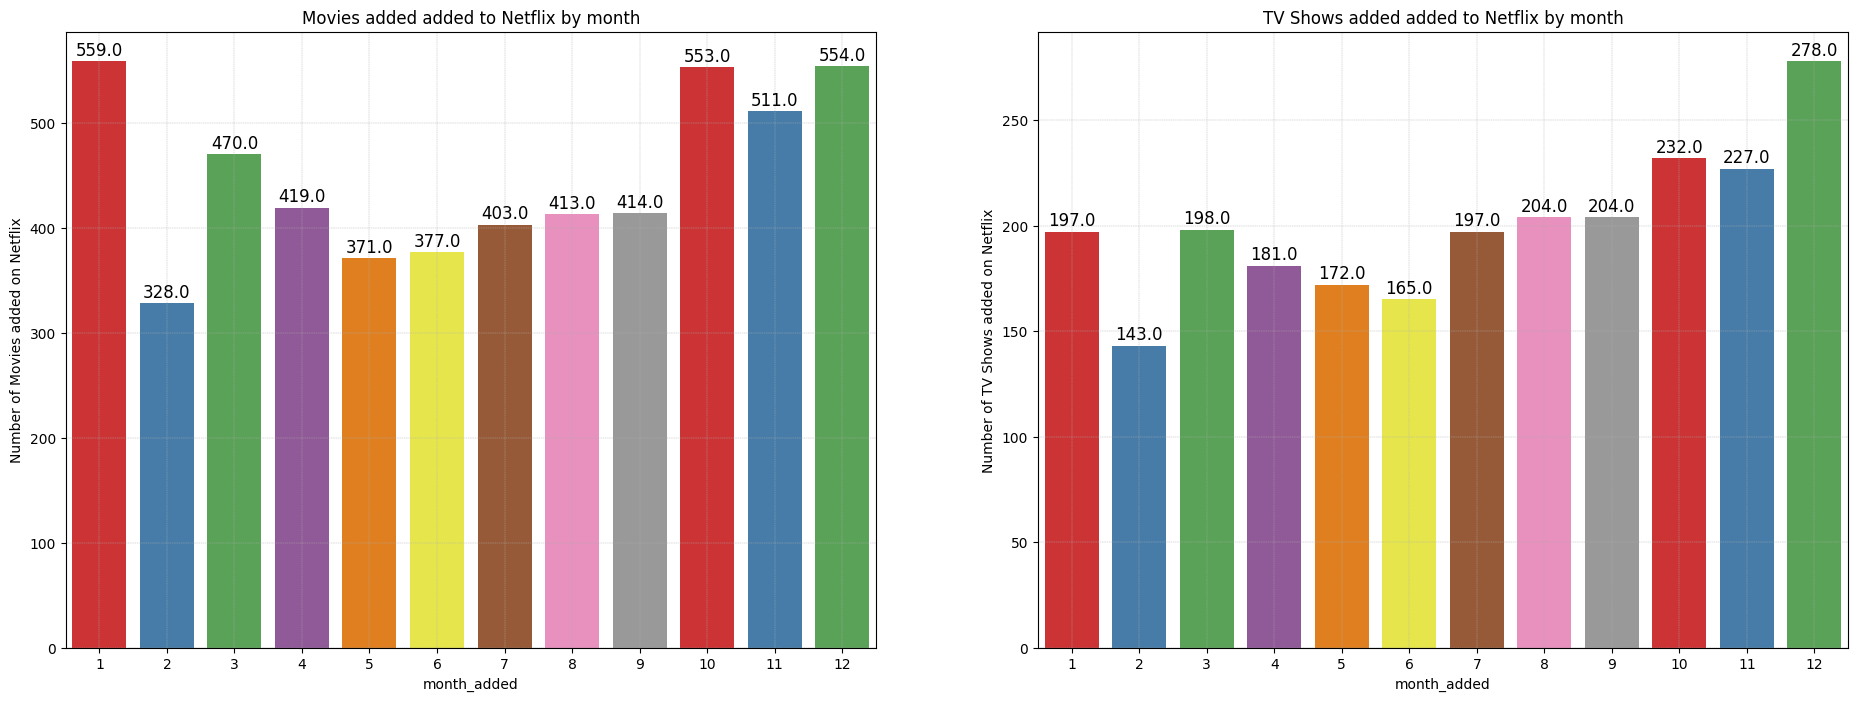

In [ ]:
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_month = i.groupby(['month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['month_added'],ascending=False)
  plots= sns.barplot(x = 'month_added',y='title', data = df_month, palette='Set1')
  plt.title(f'{j} added added to Netflix by month')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)
  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

##### 1. Why did you pick the specific chart?


We have plotted this graph to know in which month the movie/tv shows added is maximum and in which year minimum.



##### 2. What is/are the insight(s) found from the chart?

1.We found that October, November and December are the most popular months for TV shows addition.

2.January, October and November are the most popular months for movie addition.

3.February is the least popular month for the movies and TV shows to be added on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can help Netflix create a positive business impact by identifying the most popular months for new content additions. This can help Netflix plan content releases during peak periods, leading to increased user engagement and retention.

The insight that February is the least popular month for new content additions could potentially lead to negative growth if Netflix does not maintain a consistent flow of new content during this period. It is important for Netflix to keep its audience engaged throughout the year to avoid dissatisfaction and potential loss of subscribers.

 ##  Distribution of Content Rating in each highest content creating countries

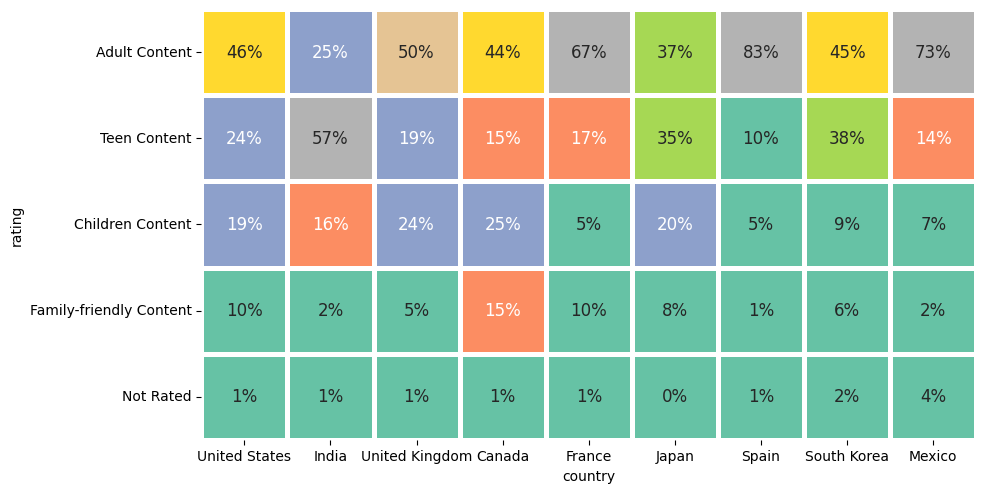

In [ ]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']
df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['rating'],normalize = "index").T

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Defining order of representation
country_order = ['United States','India','United Kingdom','Canada','France','Japan','Spain','South Korea', 'Mexico']
rating_order = ['Adult Content', 'Teen Content', 'Children Content', 'Family-friendly Content', 'Not Rated']

# calling and plotting heatmap
sns.heatmap(df_heatmap.loc[rating_order,country_order], cmap='Set2', square=True,linewidth=2.5,cbar=False,annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

This graph shows us which countries producing which type of content the most.

##### 2. What is/are the insight(s) found from the chart?

1. We found that **most of the countries produces content related to Adult and Teen.**

2. Amomg all the countries **INDIA has less content in Adult segment than teen content.**

3. **85% of content is Adult content from spain.**
4. **Canada produces more content related to Children and Family-Friendly content**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Companies should target the country audience according to there taste of content choice.

2. As in spain Production house should more focus on Adult content.

3. Production house should more focus on children and Family-friendly content for canada because there are chances of Growth.

## ***Feature Engineering & Data Pre-processing***

* We have already handled the missing values.
* There's no handling outliers, categorical encoding, feature manipulation, data transformation & data scaling.



In [ ]:
final_df.isna().sum()

title           0
Actors          0
Director        0
Genre           0
country         0
type            0
release_year    0
rating          0
duration        0
description     0
day_added       0
month_added     0
year_added      0
dtype: int64

###  Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# creating tags column using all text column which one is used for model building purpose.
df['tags'] = df['description'] + df['listed_in'] + df['rating'] + df['cast'] + df['country']

In [ ]:
df['tags'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyAdult ContentJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazil'

####  Stemming

In [ ]:
# Stemming

from nltk.stem.snowball import SnowballStemmer

# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
# appying stemming function
df['tags'] = df['tags'].apply(stemming)

In [ ]:
df.tags[0]


'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalorintern tv show tv drama tv scifi fantasyadult contentjoão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschibrazil'

####  Text Vectorization

In [ ]:
# Vectorizing Text
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(df['tags'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [ ]:
print(len(dictionary)) #number of independet features created from "tags" columns ---> max_features=10000

10000


In [ ]:
# convert vector into array form for clustering
vector = tfidf.transform(df['tags']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7770, 10000)
datatype : <class 'numpy.ndarray'>


##### Which text vectorization technique have you used and why?

Word/Text vectorization is the process of representing words as numerical vectors. This is important in NLP tasks because most machine learning models expect numerical input and cannot work with raw text data directly. Word vectorization allows you to input the words into a machine learning model in a way that preserve the meaning and context of the words. Word vectorization can also be used to measure the similarity between words using vector arithmetic.

### Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In [ ]:
df

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0               Unknown  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784            Unknown                                            Nasty C   
7785            Unknown                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            Unknown   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                      United States  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year            rating   duration  \
0             2020     Adult Content  4 Seasons   
1             2016     Adult Content     93 min   
2             2011     Adult Content     78 min   
3             2009      Teen Content     80 min   
4             2008      Teen Content    123 min   
...            ...               ...        ...   
7782          2005     Adult Content     99 min   
7783          2015      Teen Content    111 min   
7784          2019     Adult Content     44 min   
7785          2019  Children Content   1 Season   
7786          2019     Adult Content     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

    

Yes, as there 14 columns in our dataset, we need to reduce the dimntionality to reduce complexity.

In [ ]:
# DImensionality Reduction (If needed)
# using PCA to reduce dimensionality
pca = PCA(random_state=30)
pca.fit(vector)

PCA(random_state=30)

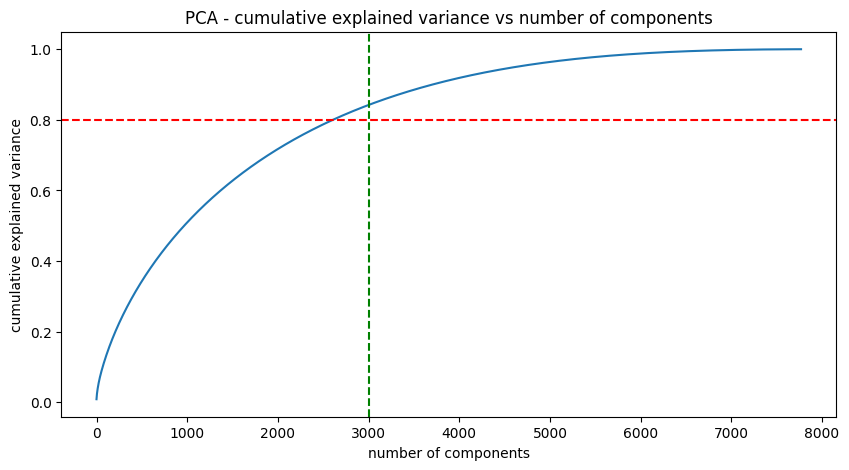

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

In [ ]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=30)
pca.fit(vector)

PCA(n_components=3000, random_state=30)

In [ ]:
# transformed features
X = pca.transform(vector)

# shape of transformed vectors
X.shape


(7770, 3000)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while preserving as much information as possible. It is a common step in machine learning and data analysis, as high-dimensional datasets can be difficult to work with and can sometimes suffer from the curse of dimensionality.

## ***7. Clusters Implementation***

### Clusters Model - 2 Hierarchical clustering

After applying the agglomerative hierarchical clustering algorithm, the resulting clusters are displayed in a dendrogram, which is a tree-like structure. The dendrogram shows the relationships between the clusters at each level of the hierarchy.

To determine the optimal number of clusters for our data, we can visually inspect the dendrogram and look for the largest vertical distance that does not intersect any horizontal line. This distance represents the largest distance between any two merged clusters, and thus the point at which the clusters are most dissimilar.

We can then draw a horizontal line at this distance and count the number of vertical lines it intersects. This number corresponds to the optimal number of clusters for our data.

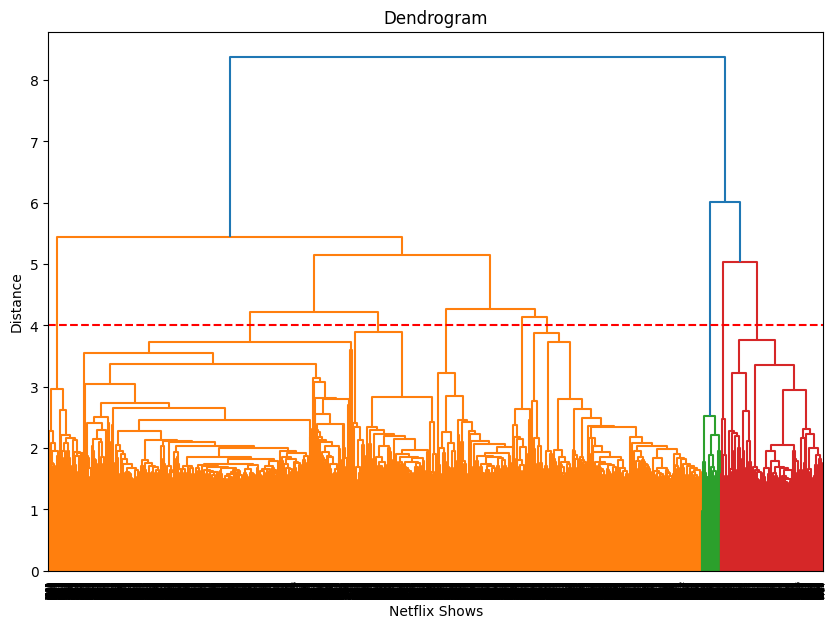

In [ ]:
# Building a dendogram to decide the number of clusters
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4, color='r', linestyle='--')

**At a distance of 4 units, 7 clusters can be built using the agglomerative clustering algorithm.**

Building 7 clusters using the Agglomerative clustering algorithm:

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(X)

array([0, 0, 1, ..., 0, 4, 0])

In [ ]:
# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
df.sample(5)[['type', 'title', 'cast', 'country', 'rating', 'listed_in', 'description', 'hierarchical_cluster']]

type                  title  \
263     Movie  Aşk Tesadüfleri Sever   
4636    Movie             One 2 Ka 4   
3403  TV Show    Kingdoms of the Sky   
5783    Movie               Standoff   
7277    Movie                  Twice   

                                                   cast               country  \
263   Mehmet Günsür, Belçim Bilgin, Ayda Aksel, Alta...                Turkey   
4636  Shah Rukh Khan, Juhi Chawla, Jackie Shroff, Ni...                 India   
3403                                            Unknown         United States   
5783  Thomas Jane, Laurence Fishburne, Joanna Dougla...                Canada   
7277                                Stuart Varnam-Atkin  Japan, United States   

                rating                                          listed_in  \
263      Adult Content      Dramas, International Movies, Romantic Movies   
4636      Teen Content               Action & Adventure, Comedies, Dramas   
3403  Children Content  British TV Shows, Docuseries, Science & Nature TV   
5783     Adult Content                                 Action & Adventure   
7277      Teen Content                Documentaries, International Movies   

                                            description  hierarchical_cluster  
263   A series of coincidences brings two star-cross...                     1  
4636  When his partner is killed, a young cop is for...                     2  
3403  Meet the astonishing animals and adventurous p...                     5  
5783  After witnessing an assassin's slaughter, a yo...                     0  
7277  This documentary reenacts the experiences of l...                     0

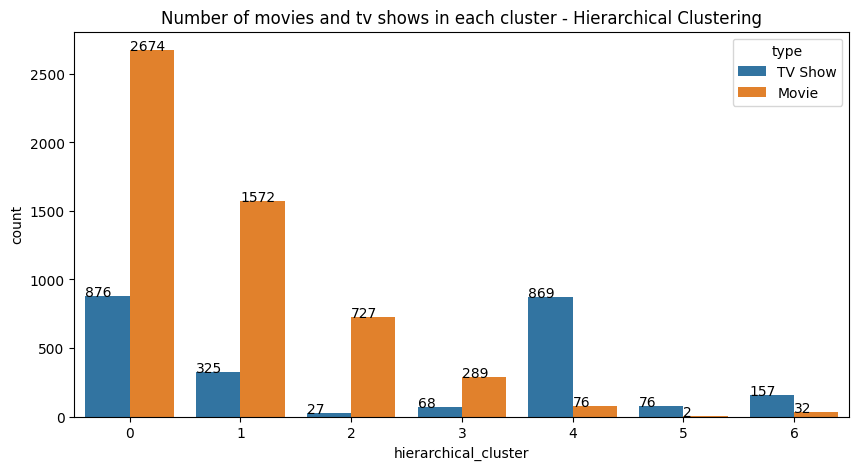

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

Successfully built 7 clusters using the Agglomerative (hierarchical) clustering algorithm.



In [ ]:
def hierarchical_worldcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  df_wordcloud = df[['hierarchical_cluster',column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['hierarchical_cluster']==cluster_number]

  # text documents
  text = " ".join(word for word in df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

cluster 0


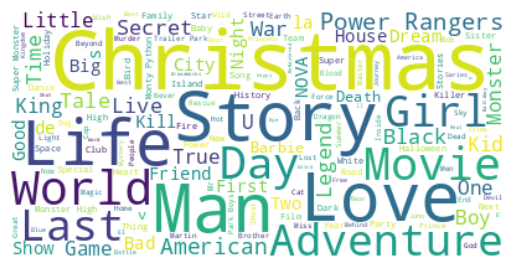

cluster 1


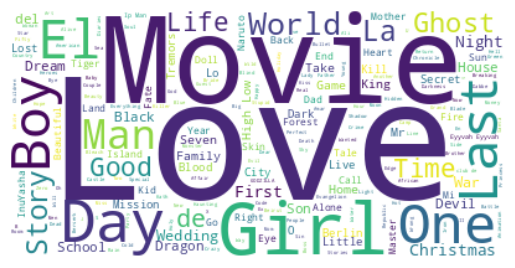

cluster 2


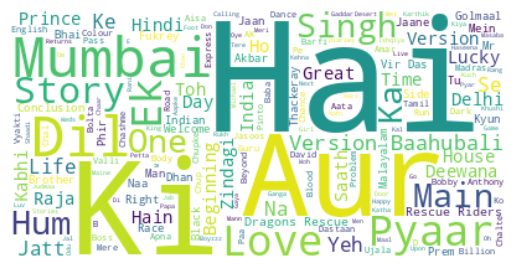

cluster 3


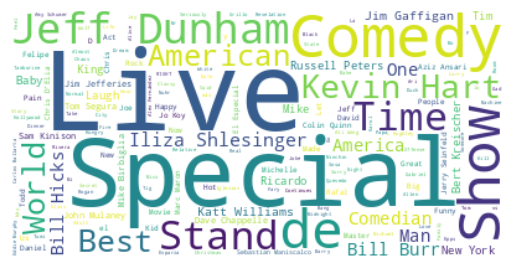

cluster 4


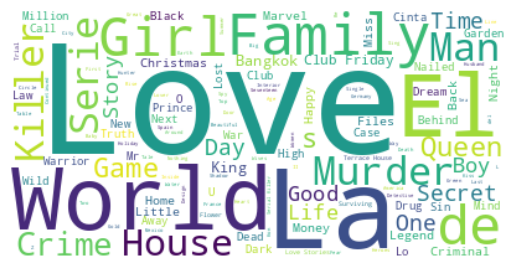

cluster 5


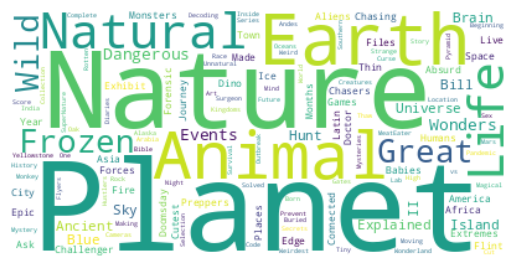

cluster 6


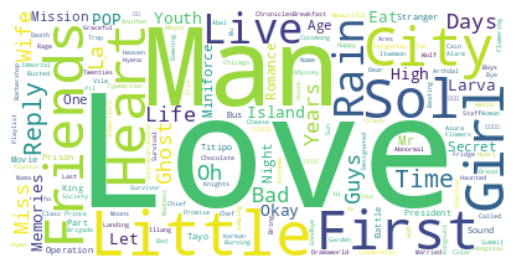

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'title')

cluster 0


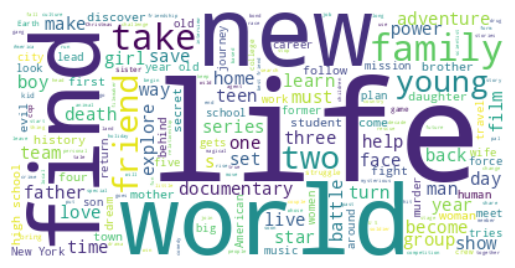

cluster 1


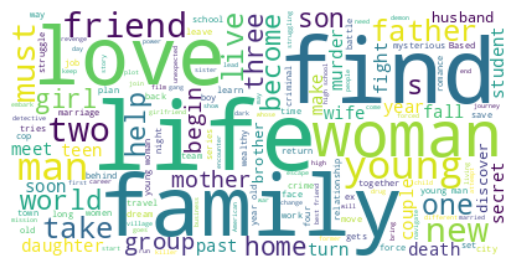

cluster 2


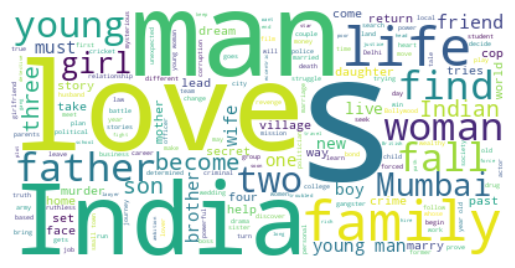

cluster 3


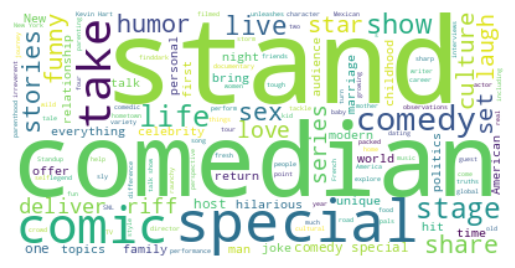

cluster 4


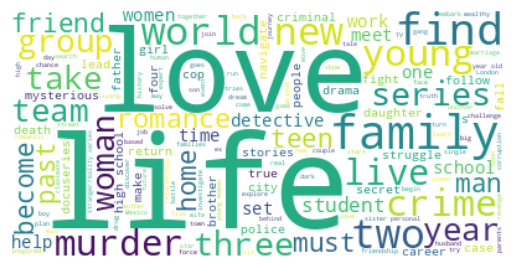

cluster 5


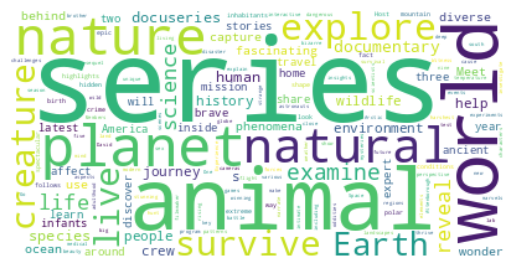

cluster 6


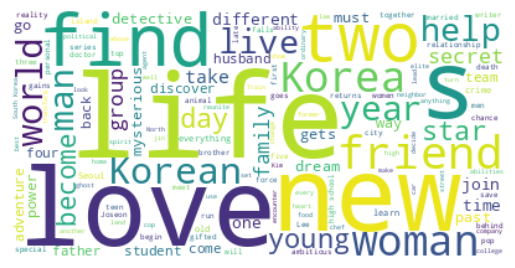

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'description')

cluster 0


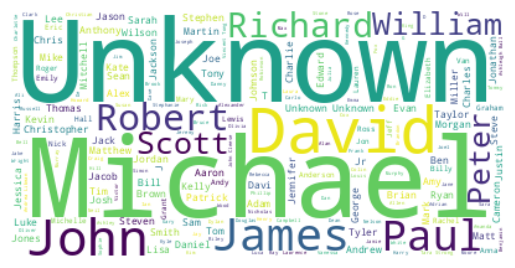

cluster 1


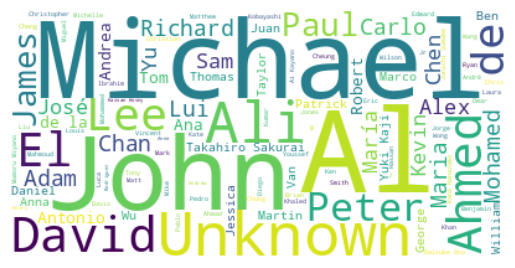

cluster 2


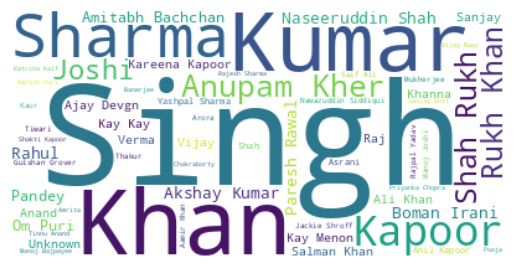

cluster 3


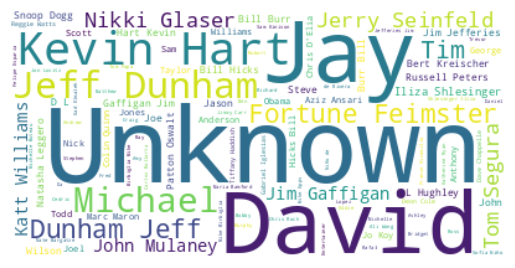

cluster 4


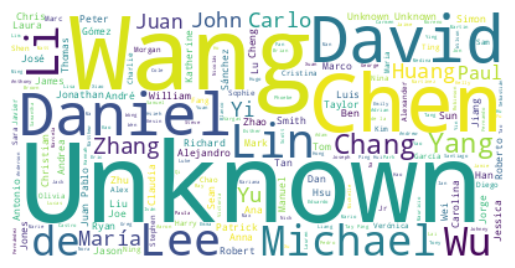

cluster 5


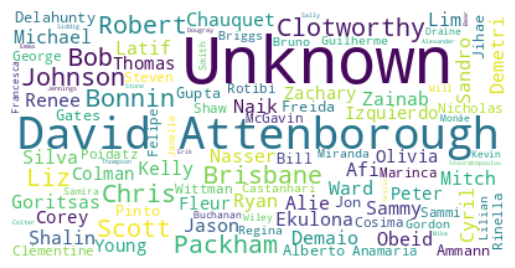

cluster 6


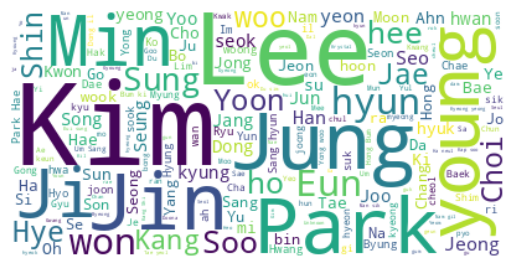

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'cast')

cluster 0


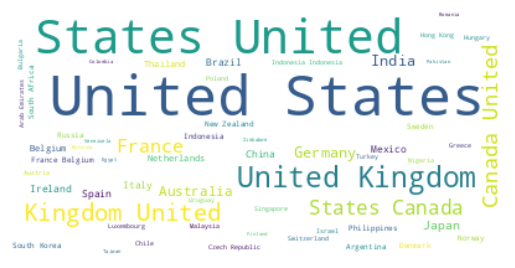

cluster 1


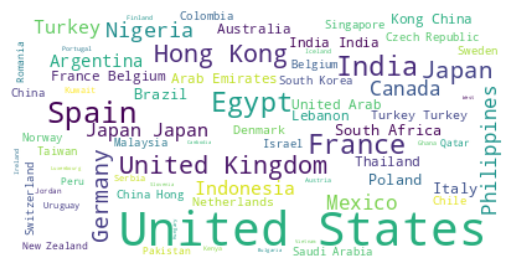

cluster 2


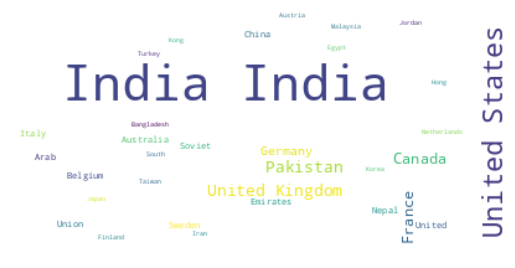

cluster 3


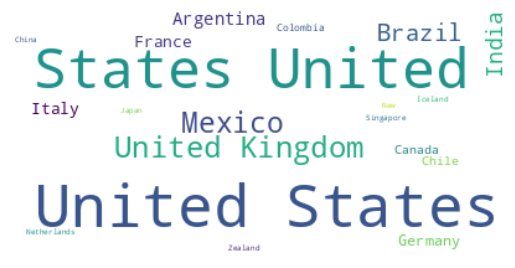

cluster 4


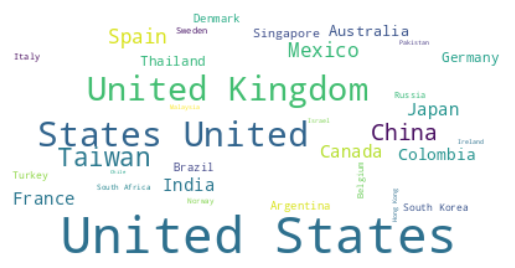

cluster 5


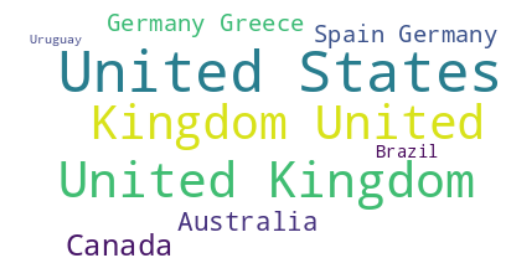

cluster 6


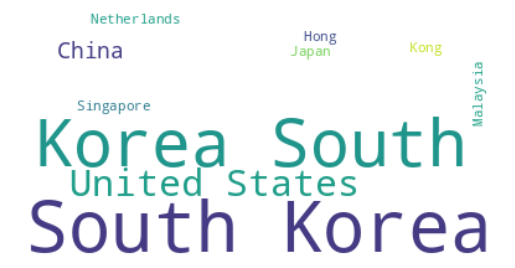

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'country')

cluster 0


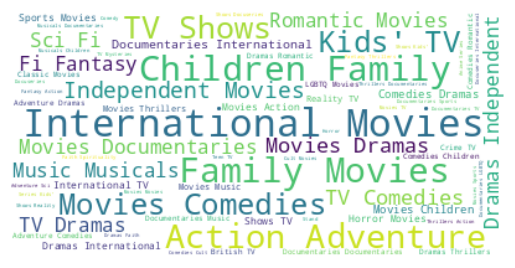

cluster 1


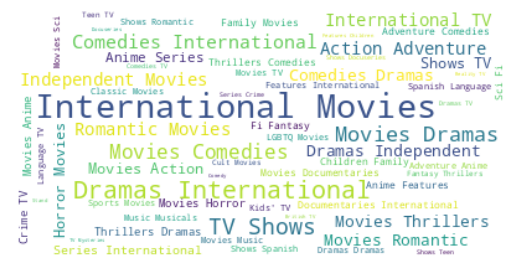

cluster 2


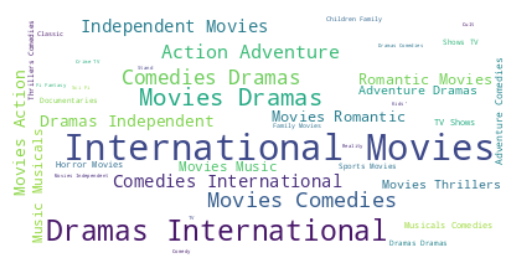

cluster 3


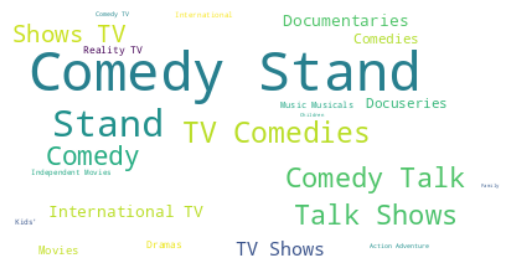

cluster 4


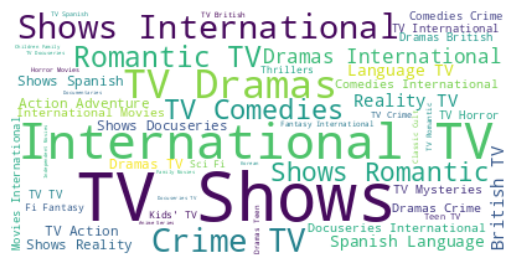

cluster 5


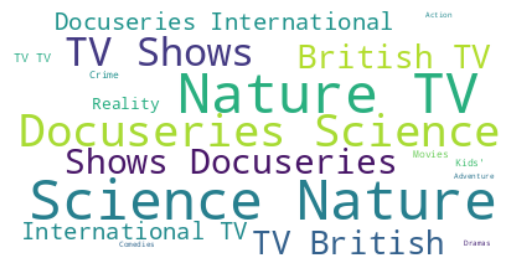

cluster 6


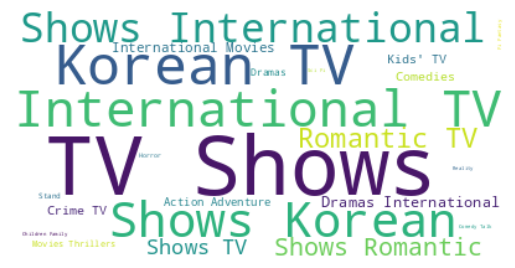

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'listed_in')

## Recommender System

In [ ]:
# defining new dataframe for building recommandation system
recommender_df = df.copy()

# reseting index
recommender_df.reset_index(inplace=True)

# checking whether or not reset index properly
recommender_df[['show_id', 'title', 'tags']]

show_id                                    title  \
0         s1                                       3%   
1         s2                                     7:19   
2         s3                                    23:59   
3         s4                                        9   
4         s5                                       21   
...      ...                                      ...   
7765   s7783                                     Zozo   
7766   s7784                                   Zubaan   
7767   s7785                        Zulu Man in Japan   
7768   s7786                    Zumbo's Just Desserts   
7769   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                                   tags  
0     futur elit inhabit island paradis far crowd sl...  
1     devast earthquak hit mexico citi trap survivor...  
2     armi recruit found dead fellow soldier forc co...  
3     postapocalypt world ragdol robot hide fear dan...  
4     brilliant group student becom cardcount expert...  
...                                                 ...  
7765  lebanon civil war depriv zozo famili hes left ...  
7766  scrappi poor boy worm way tycoon dysfunct fami...  
7767  documentari south african rapper nasti c hit s...  
7768  dessert wizard adriano zumbo look next “willi ...  
7769  documentari delv mystiqu behind bluesrock trio...  

[7770 rows x 3 columns]

As you can see above dataframe We successfully reset the index. Now dataset is ready to build content based recommandation system

In [ ]:
# dropping show-id and index column
recommender_df.drop(columns=['index', 'show_id'], inplace=True)


print(f"before reset index id for movie 'Zero' : {df[df['title'] == 'Zero'].index[0]}")  # index[0] --> to locate index position
print(f"after reset index id for movie 'Zero': {recommender_df[recommender_df['title'] == 'Zero'].index[0]}")

before reset index id for movie 'Zero' : 7764
after reset index id for movie 'Zero': 7747


In [ ]:
# calling out transformed array independent features created from tags(cluster) column after performing PCA for dimenssionality reduction.
X

array([[ 1.60630808e-01, -8.52066094e-03, -2.59942783e-02, ...,
         6.09111558e-03, -1.57436937e-02, -1.64369856e-03],
       [-4.83795907e-02, -2.86336681e-02,  1.25761169e-02, ...,
        -7.10278931e-04,  9.69816755e-03, -1.29615630e-02],
       [-4.44147521e-02, -5.70456187e-02, -3.50845700e-02, ...,
         9.82554051e-03,  4.36724833e-04, -4.11352281e-03],
       ...,
       [-7.49427548e-02,  2.49390132e-02,  9.39044679e-02, ...,
         1.76240069e-02,  1.05817263e-02,  9.63621900e-03],
       [ 6.59947673e-02,  5.09387352e-02,  5.23214985e-02, ...,
         1.60963418e-02,  1.50471608e-02,  3.41015217e-03],
       [-6.75308452e-02,  2.00151776e-01,  2.15505678e-01, ...,
        -1.56189858e-04, -1.69755841e-02, -2.52129641e-03]])

In [ ]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.        ,  0.04125331,  0.02235563, ..., -0.02250696,
         0.01016848, -0.02082098],
       [ 0.04125331,  1.        ,  0.00323192, ...,  0.07448814,
        -0.0068202 , -0.01595348],
       [ 0.02235563,  0.00323192,  1.        , ..., -0.00161926,
        -0.0101119 , -0.01692032],
       ...,
       [-0.02250696,  0.07448814, -0.00161926, ...,  1.        ,
        -0.01174126,  0.12747673],
       [ 0.01016848, -0.0068202 , -0.0101119 , ..., -0.01174126,
         1.        ,  0.04318931],
       [-0.02082098, -0.01595348, -0.01692032, ...,  0.12747673,
         0.04318931,  1.        ]])

**Function for list down top 10 recommended movie on the basis of cosine similarity score**

In [ ]:
def recommend(movie):
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = recommender_df[recommender_df['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])

    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(df.iloc[i[0]].title)

In [ ]:
recommend('Naruto')

If you liked 'Naruto', you may also enjoy: 

Nailed It! Mexico
Naked
Nails
Namak Halaal
Nailed It! Spain
Namastey London
Naledi: A Baby Elephant's Tale
DreamWorks Spooky Stories
BLAME!
Blazing Transfer Students


In [ ]:
recommend('3 Idiots')

If you liked '3 Idiots', you may also enjoy: 

Pihu
Rake
Ek Jaan Hain Hum
For Colored Girls
Dolphin Kick
Mac & Devin Go to High School
Digs & Discoveries: All Track's Lead to Rome
Colin Quinn: Unconstitutional
System Crasher
Dieter Nuhr: Nuhr in Berlin


# **Conclusion**

Our goal was to cluster the shows into groups based on their similarities and differences, ultimately creating a content-based recommender system that suggests 10 shows based on the user's viewing history.

With over 7787 records and 11 attributes, we began our adventure by delving into the dataset's missing values and performing exploratory data analysis (EDA). Our findings revealed that Netflix boasts more movies than TV shows, with a rapidly growing collection of shows from the United States.

To cluster the shows, we focused on six key attributes: director, cast, country, genre, rating, and description. We transformed these attributes into a 10000-feature TFIDF vectorization, then used Principal Component Analysis (PCA) to tackle the curse of dimensionality. By reducing the components to 3000, we were able to capture more than 80% of the variance.

Next, we used two clustering algorithms, K-Means and Agglomerative clustering, to group the shows. K-Means determined that the optimal number of clusters was 5, as confirmed by the elbow method and Silhouette score analysis. Meanwhile, Agglomerative clustering suggested 7 clusters, which we visualized using a dendrogram.

But we didn't stop there. We then created a content-based recommender system using the similarity matrix obtained through cosine similarity. This system provides personalized recommendations based on the type of show the user has watched, giving them 10 top-notch suggestions to explore.

### ***Thankyou.***